### Imports and data extraction

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from IPython.display import HTML


URL = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"


STYLE = "text-align: right"


pd.set_option("display.precision", 1)


tmp = pd.read_html(URL, attrs={"style": STYLE}, thousands=".", decimal=",")


df = tmp[3:4][0]


df.index += 1


print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
1                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
2           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
3           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
4    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
5            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
6         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
7        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
8          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
9   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
10           Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
11     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
12          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
13          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
14       Миколаївськ

### Show head of the table

In [2]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
1,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
2,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
3,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
4,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
5,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


### Define the number of rows and columns in the dataframe

In [3]:
df.shape

(28, 9)

### In the table, replace the value "—" with the value NaN

In [4]:
df = df.replace("—", np.nan)
df.tail(4)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
25,Чернігівська,22.0,18.3,12.7,10.8,6.9,9.4,9.0,6.1
26,Київ,NaN,17.4,15.9,12.0,7.3,12.0,12.1,11.0
27,Севастополь,NaN,NaN,NaN,12.5,7.0,12.0,NaN,NaN
28,Україна,22.8,20.5,15.2,12.6,7.8,11.4,11.1,8.1


### Define the types of all columns

In [5]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

### Replace non-numeric column types with numeric ones

In [6]:
df[["2014", "2019"]] = df[["2014", "2019"]].apply(pd.to_numeric)
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

### Calculate the percentage of blanks in each column

In [7]:
nan_count = df.isna().sum().div(df.shape[0])
pd.set_option("display.precision", 2)
print(nan_count)

Регіон    0.00
1950      0.07
1960      0.04
1970      0.04
1990      0.00
2000      0.00
2012      0.00
2014      0.07
2019      0.14
dtype: float64


### Delete the countrywide data from the table, the last row of the table

In [8]:
df.drop(df.tail(1).index, inplace=True)
pd.set_option("display.precision", 1)
df.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
23,Черкаська,20.5,17.9,14.4,12.3,7.5,10.0,9.8,6.4
24,Чернівецька,24.7,21.8,17.0,14.8,10.1,12.8,12.9,9.2
25,Чернігівська,22.0,18.3,12.7,10.8,6.9,9.4,9.0,6.1
26,Київ,NaN,17.4,15.9,12.0,7.3,12.0,12.1,11.0
27,Севастополь,NaN,NaN,NaN,12.5,7.0,12.0,NaN,NaN


### Replace missing data in columns with the average values of those columns

In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
1                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
2           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
3           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
4    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
5            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
6         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
7        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
8          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
9   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
10           Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
11     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
12          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
13          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
14       Миколаївськ

### Get a list of regions where the birth rate in 2019 was higher than the average for Ukraine

In [10]:
df[df["2019"] > df["2019"].mean()][["Регіон", "2019"]]

,Регіон,2019
3,Волинська,10.1
7,Закарпатська,10.4
9,Івано-Франківська,8.8
13,Львівська,8.7
15,Одеська,8.8
17,Рівненська,10.7
21,Херсонська,8.1
24,Чернівецька,9.2
26,Київ,11.0


### Which region had the highest birth rate in 2014?

In [11]:
df.loc[df["2014"].idxmax(), ["Регіон", "2014"]]

Регіон    Рівненська
2014            14.8
Name: 17, dtype: object

### Construct a bar chart of birth rates by region in 2019

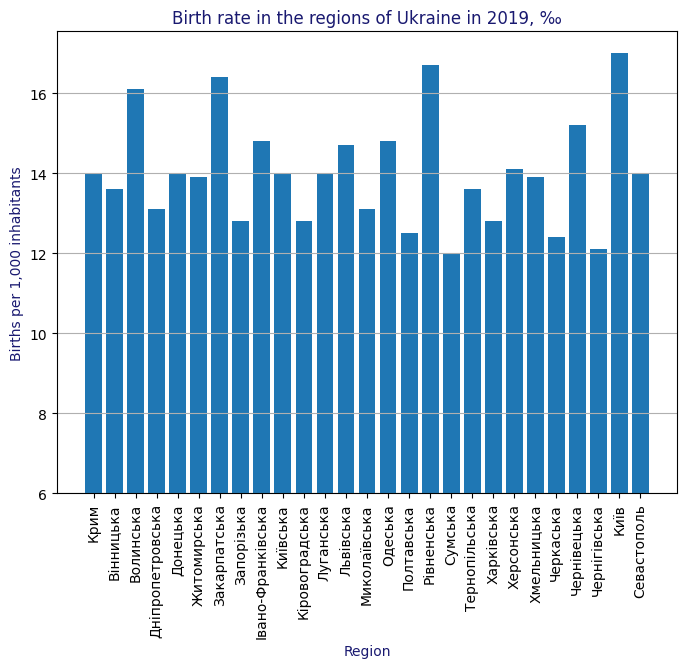

In [12]:
data = df[["Регіон", "2019"]]
plt.figure(figsize=(8, 6))
plt.bar(df["Регіон"], df["2019"], bottom=6)
plt.xlabel("Region", fontsize="medium", color="midnightblue")
plt.ylabel("Births per 1,000 inhabitants", fontsize="medium", color="midnightblue")
plt.title("Birth rate in the regions of Ukraine in 2019, ‰", fontsize="large", color="midnightblue")
plt.xticks(rotation = 90)
plt.grid(axis="y")
plt.show()

## Visualization

### Birth Rate Dinamics in Ucraine over Time

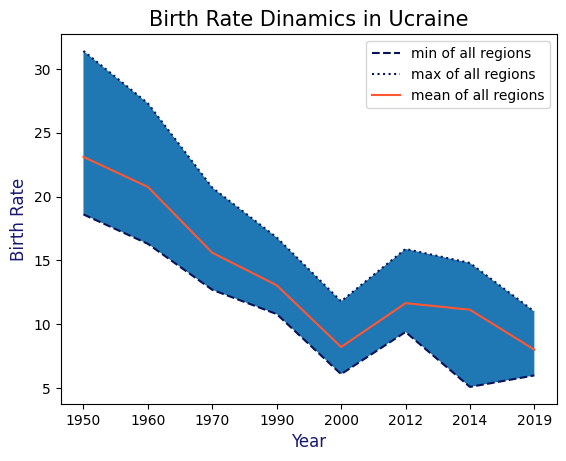

In [13]:
data = df.set_index("Регіон", inplace=False)
dd = data.agg(["min", "mean", "max"])

min_birth = dd.loc["min"]
max_birth = dd.loc["max"]

plt.plot(
    dd.loc["min"],
    label="min of all regions",
    linestyle="--",
    color="#061358",
)
plt.plot(
    dd.loc["max"],
    label="max of all regions",
    linestyle=":",
    color="#061358",
)
plt.plot(
    dd.loc["mean"],
    label="mean of all regions",
    color="#FF5733",
)
plt.xlabel("Year", fontsize="large", color="midnightblue")
plt.ylabel("Birth Rate", fontsize="large", color="midnightblue")
plt.title("Birth Rate Dinamics in Ucraine", fontsize=15)
plt.legend()
plt.fill_between(dd.columns.values, max_birth, min_birth)
plt.show()

### Birth Rates: Kiyiv City vs Kiyiv Region

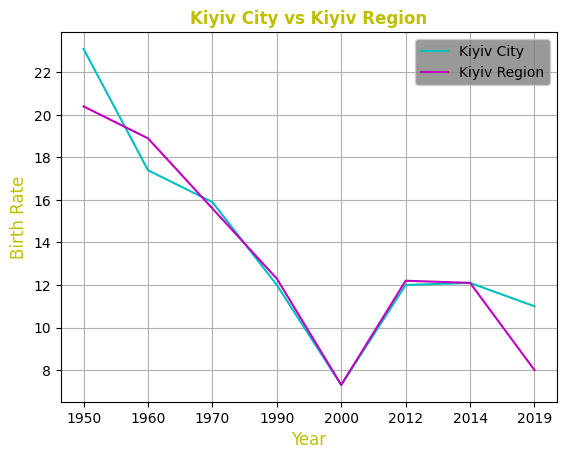

In [14]:
plt.plot(
    data.loc["Київ"],
    label="Kiyiv City",
    color="c",
)
plt.plot(
    data.loc["Київська"],
    label="Kiyiv Region",
    color="m",
)
plt.xlabel("Year", fontsize="large", color="y")
plt.ylabel("Birth Rate", fontsize="large", color="y")
plt.title("Kiyiv City vs Kiyiv Region", fontsize="large", color="y", fontweight="bold")
legend = plt.legend()
legend.get_frame().set_facecolor("grey")
plt.grid()
plt.show()

### Variation of Birth Rate in Ucraine over Time

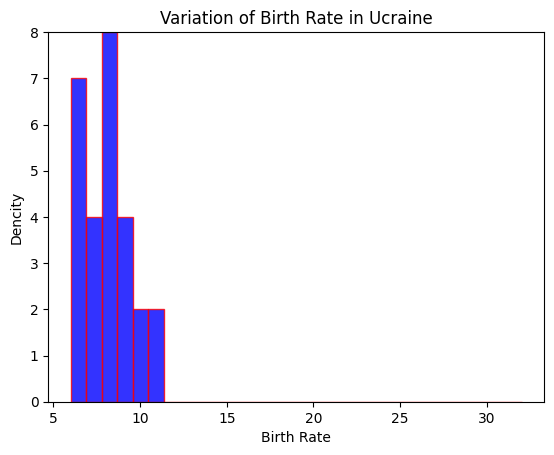

In [15]:
HIST_BINS = np.linspace(6, 32, 30)
dt = data.iloc[:, 0]
n, _ = np.histogram(dt, HIST_BINS)


def prepare_animation(bar_container):
    def animate(frame_number):
        year = data.columns.values
        dt = data[year[frame_number]]
        n, _ = np.histogram(dt, HIST_BINS)

        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)

        return bar_container.patches
    return animate


fig, ax = plt.subplots()
_, _, bar_container = ax.hist(dt, HIST_BINS, lw=1, ec="red", fc="blue", alpha=0.8)
ax.set_ylim(top=8)

ani = animation.FuncAnimation(
    fig, prepare_animation(bar_container), 8, repeat=True, blit=True
)

plt.xlabel("Birth Rate")
plt.ylabel("Dencity")
plt.title("Variation of Birth Rate in Ucraine")

HTML(ani.to_html5_video())